TWEET EMOTION RECOGNITION USING TENSORFLOW

COURSE OBJECTIVES:

1. Using a Tokenizer in TensorFlow

2. Padding and Truncating Sequences

3. Creating and Training Recurrent Neural Networks

4. Using NLP and Deep Learning to perform Text Classification



STEPS:
Task 1: Introduction

Task 2: Setup and Imports

Task 3: Importing Data

Task 4: Tokenizer

Task 5: Padding and Truncating Sequences

Task 6: Preparing Labels

Task 7: Creating the Model

Task 8: Training the Model

Task 9: Evaluating the Model


In this project, tensorflow is used to create and train a recurrent neural network which will be able to classify emotions in tweets. The dataset has thousands of tweets, each classified into one off six emotions. This is a multiclass classification problem in NLP domain. 

SETUP AND IMPORTS
Installing hugging face's nlp package
importing libraries

In [1]:
!pip install nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.1 MB/s 
     |████████████████████████████████| 212 kB 64.7 MB/s 


In [3]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random

def show_history(h):
  epochs_trained=len(h.history['loss'])
  plt.figure(figsize=(16,6))

  plt.subplot(1,2,1)
  plt.plot(range(0, epochs_trained),h.history.get('accuracy'),label='Training')
  plt.plot(range(0, epochs_trained),h.history.get('val_accuracy'),label='Validation')
  plt.ylim([0.,1.])
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(range(0, epochs_trained),h.history.get('loss'),label='Training')
  plt.plot(range(0, epochs_trained),h.history.get('val_loss'),label='Validation')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

def show_confusion_matrix(y_true, y_pred,classes):
  from sklearn.metrics import confusion_matrix

  cm=confusion_matrix(y_true,y_pred,normalize='true')
  plt.figure(figsize=(8,8))
  sp=plt.subplot(1,1,1)
  ctx=sp.matshow(cm)
  plt.xticks(list(range(0,6)),labels=classes)
  plt.yticks(list(range(0,6)),labels=classes)
  plt.colorbar(ctx)
  plt.show()

print('Using Tensorflow version', tf.__version__)



Using Tensorflow version 2.8.2


Importing data
1. importing tweet emotion dataset
2. creating train, validation and test sets
3. extracting tweets and labels from the datasets

In [4]:
dataset=nlp.load_dataset('emotion')

Downloading:   0%|          | 0.00/3.41k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/6.01k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/204k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/84e07cd366f4451464584cdbd4958f512bcaddb1e921341e07298ce8a9ce42f4. Subsequent calls will reuse this data.


In [5]:
dataset

{'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [6]:
train=dataset['train']
val=dataset['validation']
test=dataset['test']

In [15]:
def get_tweet(data):
  tweets=[x['text'] for x in data]
  labels=[x['label'] for x in data]
  return tweets, labels

In [16]:
tweets, labels =get_tweet(train)

In [17]:
tweets[0], labels[0]

('i didnt feel humiliated', 'sadness')

In [18]:
tweets[1], labels[1]

('i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'sadness')

TOKENIZER

[words to numbers transition for training the model]

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [20]:
tokenizer= Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

In [21]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

In [ ]:
tweets[0]

Padding and Truncating sequences

1. checking the length of tweets
2. creating padded sequences

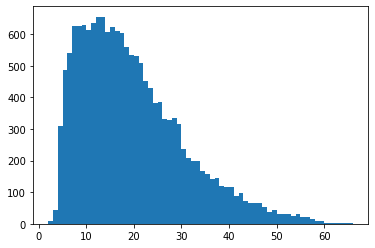

In [22]:
lengths=[len(t.split(' ')) for t in tweets]
plt.hist(lengths, bins = len(set(lengths)))
plt.show()

In [23]:
maxlen=50
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [24]:
def get_sequences(tokenizer,tweets):
  sequences=tokenizer.texts_to_sequences(tweets)
  padded= pad_sequences(sequences, truncating='post', padding='post', maxlen=maxlen)
  return padded

In [25]:
padded_train_seq=get_sequences(tokenizer,tweets)

In [26]:
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

Preparing the labels
1. creating classes to index and index to classes dictionaries
2. converting text labels to numeric labels

In [27]:
classes=set(labels)
print(classes)

{'sadness', 'anger', 'surprise', 'love', 'joy', 'fear'}


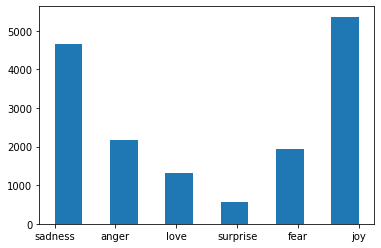

In [28]:
plt.hist(labels, bins=11)
plt.show()

In [29]:
class_to_index=dict((c,i) for i,c in enumerate(classes))
index_to_class=dict((v,k) for k,v in class_to_index.items())

In [30]:
class_to_index

{'sadness': 0, 'anger': 1, 'surprise': 2, 'love': 3, 'joy': 4, 'fear': 5}

In [31]:
index_to_class

{0: 'sadness', 1: 'anger', 2: 'surprise', 3: 'love', 4: 'joy', 5: 'fear'}

In [32]:
names_to_ids=lambda labels: np.array([class_to_index.get(x) for x in labels])

In [33]:
train_labels= names_to_ids(labels)
print(train_labels[0])

0


Creating the model

In [37]:
model=tf.keras.models.Sequential([tf.keras.layers.Embedding(10000,16,input_length=maxlen),
                                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True)),
                                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),tf.keras.layers.Dense(6, activation='softmax')])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            160000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 50, 40)           5920      
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


Training the model

In [39]:
val_tweets, val_labels=get_tweet(val)
val_seq=get_sequences(tokenizer, val_tweets)
val_labels=names_to_ids(val_labels)

In [40]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [41]:
h=model.fit(
    padded_train_seq, train_labels,
    validation_data=(val_seq,val_labels),
    epochs=20,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2)]
)

Epoch 1/20
500/500 [==============================] - 31s 50ms/step - loss: 1.3040 - accuracy: 0.4546 - val_loss: 0.8032 - val_accuracy: 0.6900
Epoch 2/20
500/500 [==============================] - 24s 49ms/step - loss: 0.5983 - accuracy: 0.7707 - val_loss: 0.6201 - val_accuracy: 0.7790
Epoch 3/20
500/500 [==============================] - 33s 67ms/step - loss: 0.3805 - accuracy: 0.8712 - val_loss: 0.5288 - val_accuracy: 0.8250
Epoch 4/20
500/500 [==============================] - 34s 69ms/step - loss: 0.2796 - accuracy: 0.9054 - val_loss: 0.5124 - val_accuracy: 0.8385
Epoch 5/20
500/500 [==============================] - 31s 62ms/step - loss: 0.2088 - accuracy: 0.9322 - val_loss: 0.4537 - val_accuracy: 0.8640
Epoch 6/20
500/500 [==============================] - 26s 51ms/step - loss: 0.1586 - accuracy: 0.9502 - val_loss: 0.4599 - val_accuracy: 0.8680
Epoch 7/20
500/500 [==============================] - 24s 47ms/step - loss: 0.1295 - accuracy: 0.9596 - val_loss: 0.5123 - val_accuracy:

Evaluating the model
1. visualizing training history
2. preparing test set
3. a look at individual predictions on the test set
4. a look at all predictions on the test set

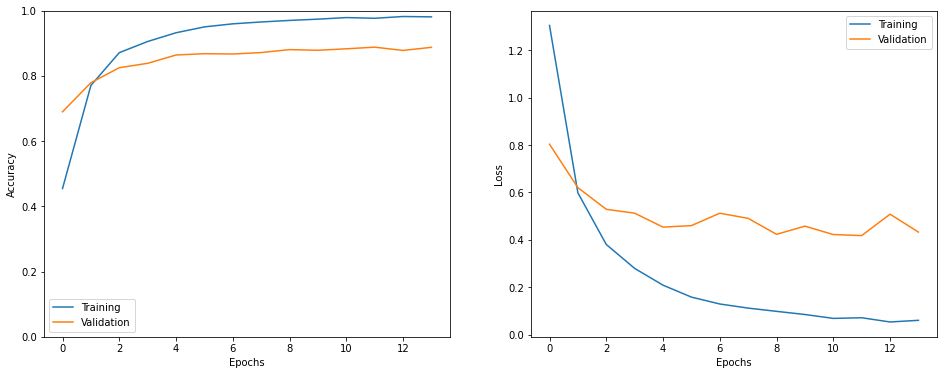

In [42]:
show_history(h)

In [43]:
test_tweets, test_labels=get_tweet(test)
test_seq=get_sequences(tokenizer, test_tweets)
test_labels=names_to_ids(test_labels)

In [44]:
_=model.evaluate(test_seq, test_labels)

63/63 [==============================] - 1s 13ms/step - loss: 0.4132 - accuracy: 0.8805


In [47]:
i=random.randint(0,len(test_labels)-1)
print('Sentence: ', test_tweets[i])
print('Emotion: ',index_to_class[test_labels[i]])
p=model.predict(np.expand_dims(test_seq[i], axis=0))[0]
pred_class=index_to_class[np.argmax(p).astype('uint8')]
print('Predicted emotion: ', pred_class)

Sentence:  i don t care if any of you read this but this is just what i feel when i m around you guys i feel hated
Emotion:  sadness
Predicted emotion:  anger


In [56]:
preds=model.predict(test_seq)

In [59]:
show_confusion_matrix(test_labels,preds,list(classes))

ValueError: ignored